#### Python Data Science Handbook

##### Ipython ShortCuts
* len? - prints documentation
* len?? - prints source code if present, else documentation
* "*Warning?" - print everthing that contains "Warning"
* %paste - paste python code with indentation (doesn't print prompt characters)
* %cpaste - opens up multi line prompt
* %run - run external command like %run myscript.sh
* %timeit - determins the execution time of a single line python statement like %timeit L = [x for x in range(10)]
* %%timeit - timeit for multi-line statements
* In/Out - list of all the input and output objects,
* _ and __ - previous and one before previous output
* %xmode Verbose - detailed error trace printing.

## Machine Learning

Types of Learning

* Supervised Learning

Create model on the training data with outcome being known, and then predict on unknown data. 
Eg: A is going on a trip to Goa, when B has planned his full itinerary.

Types

    - Classification
    
        the outcome(predicted category) is discrete
        
    - Regression
        
        the outcome is continuous

* Unsupervised Learning

Create model on the training data without the outcome being known. "Letting the data speak for itself".
Eg: A is going on a trip to Goa, with a mindset of exploring by himself (Explore yourself).

Types

    - Clustering
    
        leave the data and let it organize itself in groups
        
    - Dimensionality Reduction
    
        reduce the attributes of the data, preserving the relevant qualities of the dataset.

In [3]:
# Intro to scikit
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Features matrix

A two dimensional matrix, representing the data and its features. Of form [n_samples, n_features], mostly modeled in code as `X`
Each row is a sample and each column is feature.

#### Target array

A single dimensional array, representing the label or target array. We assume this as `y` in code.


Target array is different from features, in the sense that it is usually the quantity we want to predict from the data, or in better words __the dependent variable__.


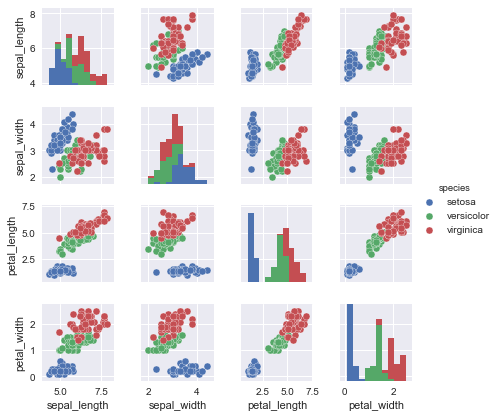

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);


In [5]:
# we will drop species column from the iris dataset and use it as a feature to predict(y)
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

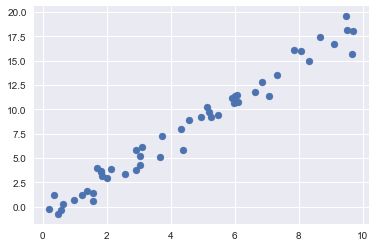

In [7]:
## Supervised Learning : Linear Regression
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [9]:
from sklearn.linear_model import LinearRegression

#### Before proceeding further using Scikit, remember

There are some parameters called hyperparameter, which must be tuned before fitting any model to the data. In scikit, they are chosen at the time of model instantiation.

Also instantiating the model does not mean, that the model is ready for prediction. It only means that we have stored the hyperparameters, which will be used whenever the data is being provided to model for fitting.

In [10]:
model = LinearRegression(fit_intercept=True)

In [11]:
# features matrix should be a 2-d matrix
X=x[:, np.newaxis]
X.shape

(50, 1)

In [13]:
# now fit data to model
model.fit(X, y)

/Users/tj/myapps/notebooks/pyenv/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# represents the slope of the linear fit to data
model.coef_

array([ 1.9776566])

In [19]:
# represets the intercept of the linear fit to data
model.intercept_

-0.90331072553111635

In [21]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

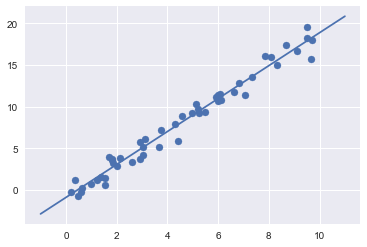

In [23]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

__Takeaway__: Here we just got a hands on scikit api, learned how can we fit data to a model. No prediction were done since all the data was used to train the model.

Next we will learn how to train model as well as predict the outcome for some unknown data. 

In [25]:
# cross_validation is deprecated.
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

__Takeaway__: Split data into training and testing data and then predict the outcome. Scikit offers a uniform api to do this for any type of classifier.

Next we will see learn how to do dimensionality reduction in unsupervised learning. Iris dataset has 4 dimensions, thereby making it difficult to visualize the data. We will use PCA to model data into two dimensions, thereby making it easy to visualize.

In [29]:
from sklearn.decomposition import PCA
# speciyfing hyperparameter while instantiating model instance
model = PCA(n_components=2)
# no need to pass outcome
model.fit(X_iris)
X_2D = model.transform(X_iris)

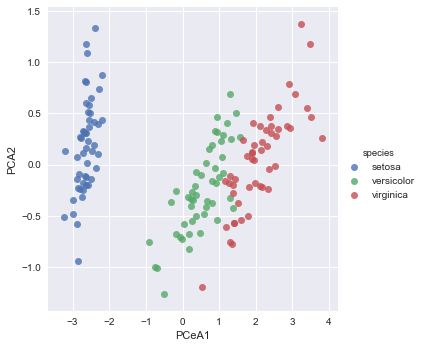

In [35]:
# lets plot the data
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

__Takeaway__: By reducing the dimension of the data, we could easily plot and see the data (2D).

Next we will learn how to use cluster alogrithm as an unsupervised technique to group data.

In [38]:
# GMM is deprecated
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

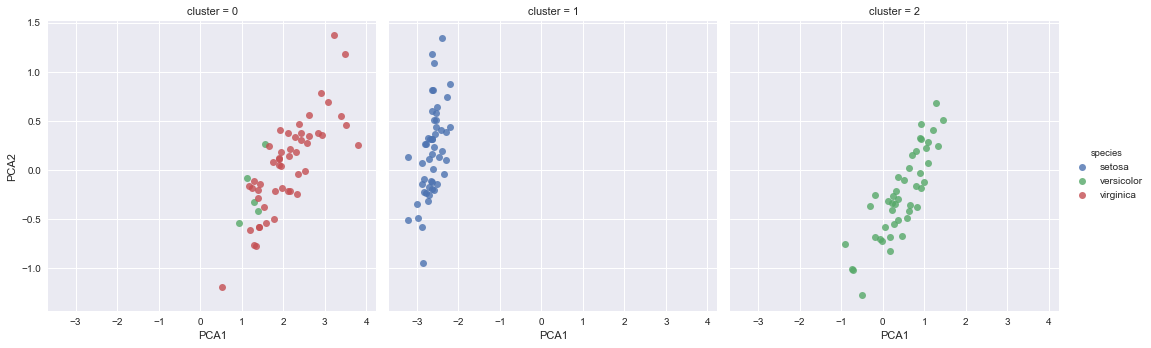

In [39]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);


Lets try out one application of Unsupervised algorithms. We will be exploring __Hand Written Digits__. 

In [40]:
# load digits data already provided with scikit
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

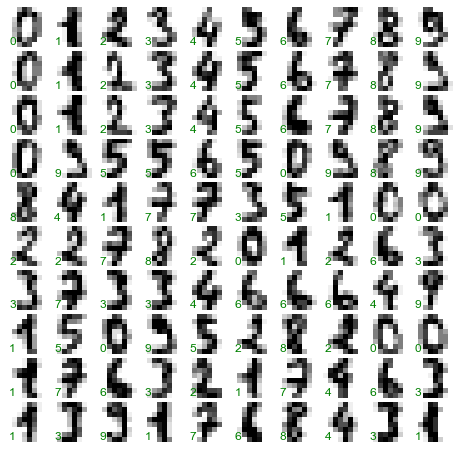

In [42]:
# lets view the data
# each image consists of 8 X 8 grid of pixels.
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')


In [52]:
X = digits.data
X.shape

(1797, 64)

In [53]:
y = digits.target
y.shape

(1797,)

In [54]:
# to be able to use this data with scikit, we need to reduce its dimension.
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

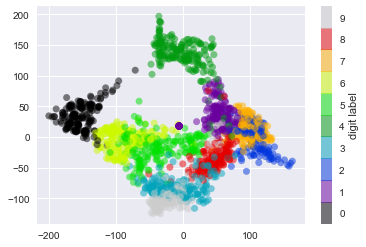

In [55]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);


In [56]:
# lets use this data and classify
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [57]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)
# 80% accuracy, not bad

0.83333333333333337

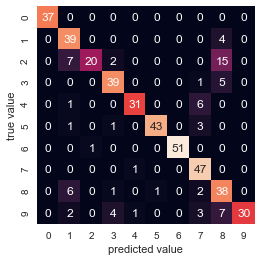

In [61]:
# using confusion matrix, we can find out where have we gone wrong
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');


On seeing the confusion matrix, we find out `2` was sometimes read as `1` and `8`

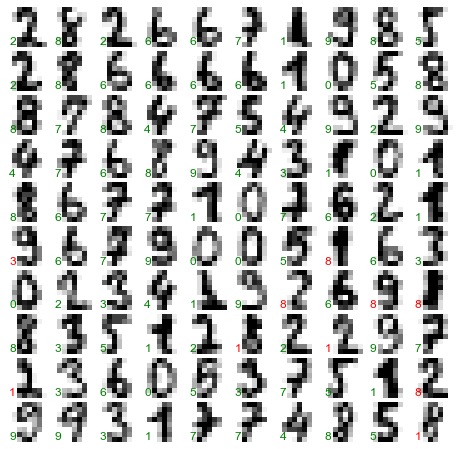

In [62]:
# lets see where the prediction was wrong
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')


This completes our chapter 1. At the end, I learned the following

* What are Supervised and Unsupervised learning? Thier types ?

* How to use scikit api to train and predict model ? 

* How 